In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

from micrograd import *

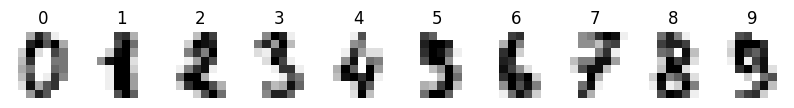

In [2]:
# The data
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("%i" % label)

In [3]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 90% train and 10% test subsets
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.9, shuffle=False
)

Y_train = np.identity(10)[Y_train]  # convert to one hot encoding
Y_test = np.identity(10)[Y_test]  # convert to one hot encoding

In [4]:
# Train the model
mlp = MLP(64, [16, 16, 10], "sigmoid")
losses = mlp.fit(X_train, Y_train, 512, 0.001)

In [5]:
# Determine the training and testing accuracy
def classlabel(X):
    return max(range(len(X)), key=X.__getitem__)

def accuracy(X, Y):
    same = 0
    for i in range(len(X)):
        same += (X[i] == Y[i])
    return float(same) / len(X)

pred_labels_train = list(map(classlabel, [mlp.predict(x) for x in X_train]))
true_labels_train = list(map(classlabel, Y_train))
print("Training accuracy: ", accuracy(pred_labels_train, true_labels_train))

pred_labels = list(map(classlabel, [mlp.predict(x) for x in X_test]))
true_labels = list(map(classlabel, Y_test))
print(" Testing accuracy: ", accuracy(pred_labels, true_labels))

Training accuracy:  0.9385474860335196
 Testing accuracy:  0.5407911001236094


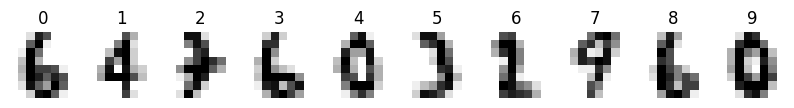

In [7]:
# Show some incorrectly predicted images
idxs = []
wrong_labels = set()
for i in range(len(pred_labels)):
    pred_label = pred_labels[i]
    if pred_label != true_labels[i] and pred_label not in wrong_labels:
        wrong_labels.add(pred_label)
        idxs.append(i)
idxs.sort(key=lambda i: pred_labels[i])

_, axes = plt.subplots(nrows=1, ncols=len(idxs), figsize=(len(idxs), 3))
for ax, i, in zip(axes, idxs):
    image = X_test[i].reshape(8,8)
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("%i" % pred_labels[i])